In [2]:
import pandas as pd

# Загрузка датасетов
dataset1 = pd.read_csv('dataset1.csv')
dataset2 = pd.read_csv('dataset2.csv')
dataset3 = pd.read_csv('dataset3.csv')

# Вывод информации
print("Dataset1 info:")
print(dataset1.info())
print("Dataset1 unique labels:", dataset1['LABEL'].nunique())
print("Dataset1 head:")
print(dataset1.head())

print("\nDataset2 info:")
print(dataset2.info())
print("Dataset2 unique labels:", dataset2['LABEL'].nunique())
print("Dataset2 head:")
print(dataset2.head())

print("\nDataset3 info:")
print(dataset3.info())
print("Dataset3 unique labels:", dataset3['LABEL'].nunique())
print("Dataset3 head:")
print(dataset3.head())

Dataset1 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F0      1000 non-null   float64
 1   F1      1000 non-null   float64
 2   F2      1000 non-null   float64
 3   F3      1000 non-null   float64
 4   LABEL   1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB
None
Dataset1 unique labels: 3
Dataset1 head:
         F0        F1         F2         F3  LABEL
0 -2.182270  8.795186   5.469284  -0.237966      0
1  3.698693  3.215945 -10.741661  10.535512      2
2 -7.254824 -7.197825  -7.556684   7.881214      1
3 -3.186120  9.625962   5.670878   2.904450      0
4  2.279499  3.920786  -9.580430   9.072586      2

Dataset2 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F0      1000 non-n

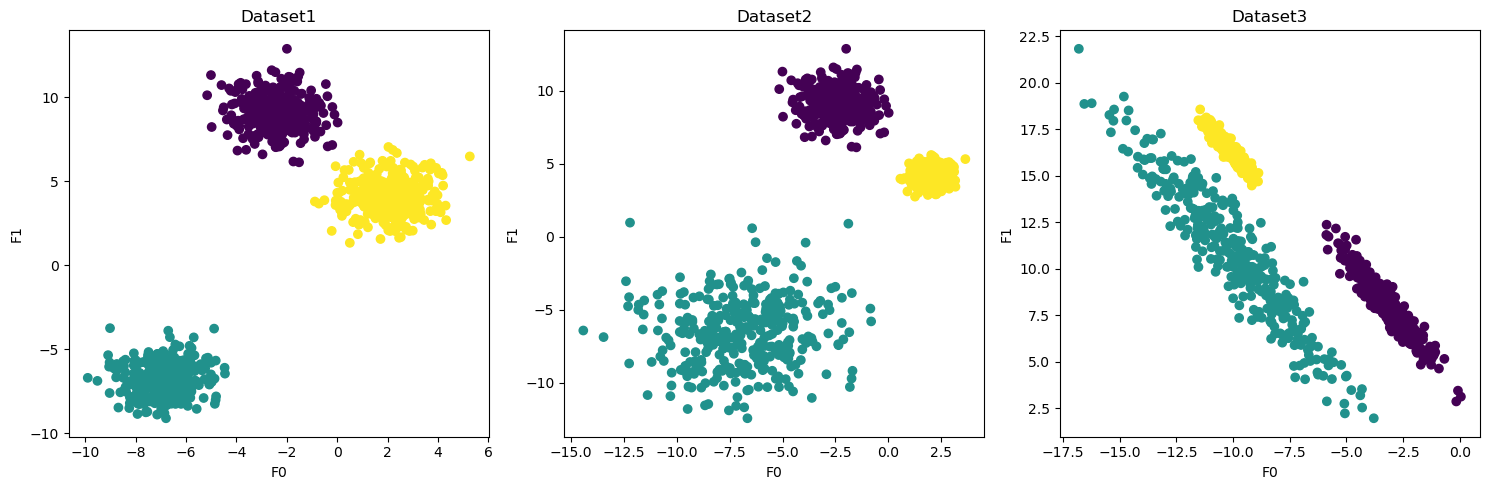

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка датасетов
dataset1 = pd.read_csv('dataset1.csv')
dataset2 = pd.read_csv('dataset2.csv')
dataset3 = pd.read_csv('dataset3.csv')

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Dataset1
axes[0].scatter(dataset1['F0'], dataset1['F1'], c=dataset1['LABEL'], cmap='viridis')
axes[0].set_title('Dataset1')
axes[0].set_xlabel('F0')
axes[0].set_ylabel('F1')

# Dataset2
axes[1].scatter(dataset2['F0'], dataset2['F1'], c=dataset2['LABEL'], cmap='viridis')
axes[1].set_title('Dataset2')
axes[1].set_xlabel('F0')
axes[1].set_ylabel('F1')

# Dataset3
axes[2].scatter(dataset3['F0'], dataset3['F1'], c=dataset3['LABEL'], cmap='viridis')
axes[2].set_title('Dataset3')
axes[2].set_xlabel('F0')
axes[2].set_ylabel('F1')

plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

dataset2 = pd.read_csv('dataset2.csv')

# Группировка по LABEL и расчет дисперсии для F0 и F1
variance_by_cluster = dataset2.groupby('LABEL')[['F0', 'F1']].var()
print(variance_by_cluster)

             F0        F1
LABEL                    
0      0.884064  1.071772
1      5.498342  5.580225
2      0.258691  0.272631


In [7]:
!pip install scikit-learn==1.3.2

In [8]:
import sklearn
print(sklearn.__version__)

1.3.2


In [10]:
import pandas as pd
from sklearn.cluster import KMeans

# Загрузка датасета
# Замените 'path_to_dataset1.csv' на реальный путь к файлу
dataset1 = pd.read_csv('dataset1.csv')

# Исключаем колонку LABEL, используем только признаки F0, F1, F2, F3
X = dataset1[['F0', 'F1', 'F2', 'F3']]

# Применяем k-средних с 3 кластерами и random_state=42
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Получаем центры кластеров
cluster_centers = kmeans.cluster_centers_
print("Центры кластеров:")
print(cluster_centers)

# Последний кластер — это последняя строка в cluster_centers
last_cluster_center = cluster_centers[-1]

# 4-я координата (индекс 3, так как индексация начинается с 0)
fourth_coordinate = last_cluster_center[3]

# Округляем до 3-го знака после запятой
fourth_coordinate_rounded = round(fourth_coordinate, 3)
print("4-я координата центра последнего кластера:", fourth_coordinate_rounded)

Центры кластеров:
[[ 2.08128181  4.08135021 -9.6546176   9.43829232]
 [-2.47972233  9.03626136  4.68100968  2.02428364]
 [-6.8836951  -6.74468537 -8.85281957  7.31515829]]
4-я координата центра последнего кластера: 7.315


C:\Users\arkhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
import pandas as pd
from sklearn.cluster import KMeans

# Загрузка датасета
dataset2 = pd.read_csv('dataset2.csv')

# Исключаем колонку LABEL, используем только признаки F0, F1, F2, F3
X = dataset2[['F0', 'F1', 'F2', 'F3']]

# Применяем k-средних с 2 кластерами и random_state=42
kmeans = KMeans(n_clusters=2, random_state=42)
dataset2['kmeans_labels'] = kmeans.fit_predict(X)

# Сравниваем с ожидаемыми метками (LABEL)
print("Распределение по k-средних:")
print(dataset2.groupby('LABEL')['kmeans_labels'].value_counts())

Распределение по k-средних:
LABEL  kmeans_labels
0      1                334
1      0                333
2      0                333
Name: count, dtype: int64


C:\Users\arkhi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
from scipy.cluster.hierarchy import linkage, fcluster

# Выполняем иерархическую кластеризацию с полной связью
Z = linkage(X, method='complete')

# Формируем 2 кластера с критерием maxclust
hierarchical_labels = fcluster(Z, t=2, criterion='maxclust')

# Добавляем метки в датасет (сдвигаем на -1, так как fcluster возвращает метки начиная с 1)
dataset2['hierarchical_labels'] = hierarchical_labels - 1

# Сравниваем с ожидаемыми метками (LABEL)
print("Распределение по иерархической кластеризации:")
print(dataset2.groupby('LABEL')['hierarchical_labels'].value_counts())

Распределение по иерархической кластеризации:
LABEL  hierarchical_labels
0      1                      334
1      0                      333
2      1                      333
Name: count, dtype: int64


In [14]:
print("\nDataset3 info:")
print(dataset3.info())
print("Dataset3 unique labels:", dataset3['LABEL'].nunique())
print("Dataset3 head:")
print(dataset3.head())


Dataset3 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F0      1000 non-null   float64
 1   F1      1000 non-null   float64
 2   F2      1000 non-null   float64
 3   F3      1000 non-null   float64
 4   LABEL   1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB
None
Dataset3 unique labels: 3
Dataset3 head:
          F0         F1         F2         F3  LABEL
0  -1.499212   5.202552  -1.499212   5.202552      0
1 -10.027096  16.292373 -10.027096  16.292373      2
2  -8.609967   9.453919  -8.609967   9.453919      1
3  -3.611808   9.100601  -3.611808   9.100601      0
4  -9.950580  16.051347  -9.950580  16.051347      2


In [15]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Загрузка датасета
dataset3 = pd.read_csv('dataset3.csv')

# Исключаем колонку LABEL, используем только признаки F0, F1, F2, F3
X = dataset3[['F0', 'F1', 'F2', 'F3']]

# Применяем DBSCAN с eps=0.3, min_samples=10 и евклидовой метрикой
dbscan = DBSCAN(eps=0.3, min_samples=10, metric='euclidean')
dataset3['dbscan_labels'] = dbscan.fit_predict(X)

# Подсчитываем количество кластеров (исключая шум, т.е. метку -1)
n_clusters = len(set(dataset3['dbscan_labels'])) - (1 if -1 in dataset3['dbscan_labels'] else 0)
print("Количество кластеров:", n_clusters)

# Дополнительно: распределение точек по кластерам
print("Распределение точек по кластерам:")
print(dataset3['dbscan_labels'].value_counts())

Количество кластеров: 7
Распределение точек по кластерам:
dbscan_labels
-1    484
 0    300
 2    136
 1     50
 5     11
 4     10
 3      9
Name: count, dtype: int64


In [16]:
import pandas as pd
from sklearn.cluster import DBSCAN

# Загрузка датасета
dataset3 = pd.read_csv('dataset3.csv')

# Исключаем колонку LABEL, используем только признаки F0, F1, F2, F3
X = dataset3[['F0', 'F1', 'F2', 'F3']]

# Применяем DBSCAN с eps=1.5, min_samples=8 и евклидовой метрикой
dbscan = DBSCAN(eps=1.5, min_samples=8, metric='euclidean')
dataset3['dbscan_labels'] = dbscan.fit_predict(X)

# Подсчитываем количество кластеров (исключая шум, т.е. метку -1)
n_clusters = len(set(dataset3['dbscan_labels'])) - (1 if -1 in dataset3['dbscan_labels'] else 0)
print("Количество кластеров:", n_clusters)

# Распределение точек по кластерам
print("Распределение точек по кластерам:")
print(dataset3['dbscan_labels'].value_counts())

# Сравнение с ожидаемыми метками (LABEL)
print("Сравнение с ожидаемыми метками:")
print(dataset3.groupby('LABEL')['dbscan_labels'].value_counts())

Количество кластеров: 4
Распределение точек по кластерам:
dbscan_labels
 1    333
 0    331
 2    320
-1     16
Name: count, dtype: int64
Сравнение с ожидаемыми метками:
LABEL  dbscan_labels
0       0               331
       -1                 3
1       2               320
       -1                13
2       1               333
Name: count, dtype: int64


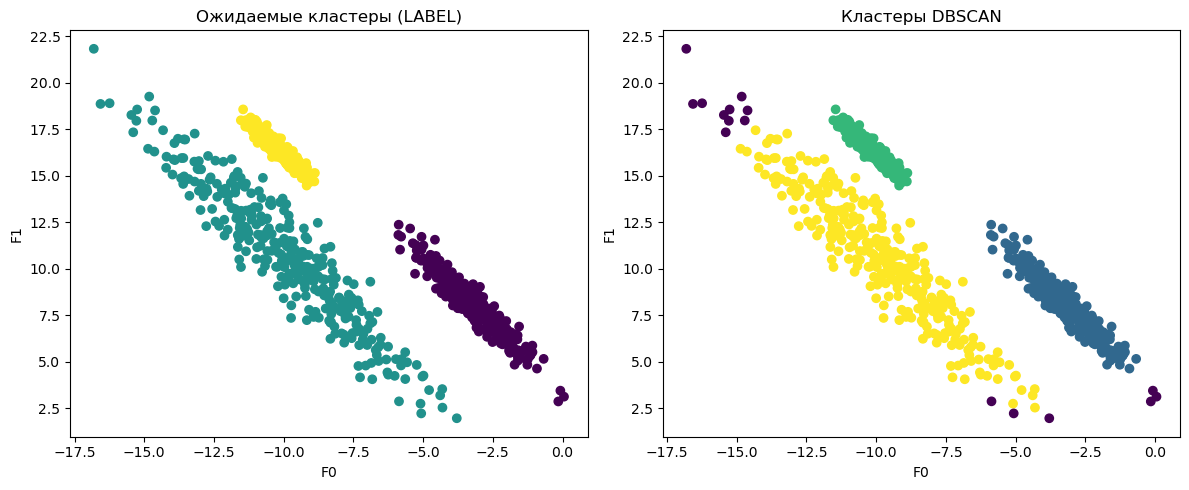

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка датасета
dataset3 = pd.read_csv('dataset3.csv')

# Применяем DBSCAN (уже выполнено, результаты есть)
from sklearn.cluster import DBSCAN
X = dataset3[['F0', 'F1', 'F2', 'F3']]
dbscan = DBSCAN(eps=1.5, min_samples=8, metric='euclidean')
dataset3['dbscan_labels'] = dbscan.fit_predict(X)

# Построим два графика: ожидаемые метки и метки DBSCAN
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# График 1: Ожидаемые метки (LABEL)
ax1.scatter(dataset3['F0'], dataset3['F1'], c=dataset3['LABEL'], cmap='viridis')
ax1.set_title('Ожидаемые кластеры (LABEL)')
ax1.set_xlabel('F0')
ax1.set_ylabel('F1')

# График 2: Метки DBSCAN
ax2.scatter(dataset3['F0'], dataset3['F1'], c=dataset3['dbscan_labels'], cmap='viridis')
ax2.set_title('Кластеры DBSCAN')
ax2.set_xlabel('F0')
ax2.set_ylabel('F1')

plt.tight_layout()
plt.show()